In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [126]:
df_av=pd.read_csv("avocado_ds.csv")

In [127]:
df_av

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [128]:
df_av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [129]:
df_av.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [130]:
df_av.sample(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
157,34,03-05-2015,1.17,552368.94,3828.64,429586.28,239.76,118714.26,115148.87,3565.39,0.00,conventional,2015,Boston
966,37,12-04-2015,1.01,515246.69,260591.11,189713.87,14665.62,50276.09,26305.87,23949.07,21.15,conventional,2015,SanDiego
1248,30,31-05-2015,0.74,887045.15,626724.73,124037.26,25328.56,110954.60,78423.65,32530.95,0.00,conventional,2015,WestTexNewMexico
1402,46,07-02-2016,1.05,678810.37,5986.94,511548.60,25200.19,136074.64,134178.50,1896.14,0.00,conventional,2016,Boston
1287,35,24-04-2016,0.79,654018.81,233878.10,189043.44,67.42,231029.85,71926.92,158919.60,183.33,conventional,2016,Atlanta


In [131]:
df_av.shape

(1517, 14)

In [132]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [133]:
df_av.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [134]:
df_av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [135]:
#Droping unnamed column

In [136]:
df_av.drop("Unnamed: 0",axis=1,inplace=True)

In [137]:
df_av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [138]:
# Three column names are in numbers ,changing that for better understanding

In [139]:
df_av.rename(columns={'4046':'SM','4225':'LA','4770':'XLA'},inplace=True)

In [140]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [141]:
df_av.type.unique()

array(['conventional'], dtype=object)

In [142]:
df_av=pd.get_dummies(df_av,columns=['type',],drop_first=True)

In [143]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,Charlotte


In [144]:
LE=LabelEncoder()
df_av['region']=LE.fit_transform(df_av['region'])

In [145]:
df_av

,Date,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7


In [146]:
df_av.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [147]:
df_av.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
SM              0
LA              0
XLA             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

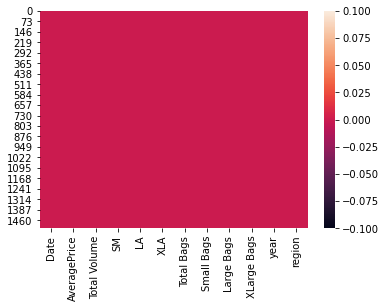

In [148]:
sns.heatmap(df_av.isnull())

In [149]:
df_avcor=df_av.corr()

In [150]:
df_avcor

,AveragePrice,Total Volume,SM,LA,XLA,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
SM,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
LA,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
XLA,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


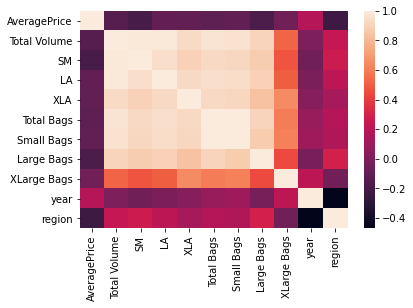

In [151]:
sns.heatmap(df_av.corr())

# Data distributed with avaerage price

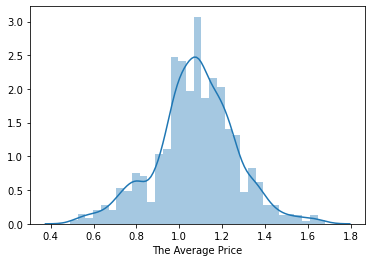

In [152]:
sns.distplot(df_av['AveragePrice'],axlabel="The Average Price")

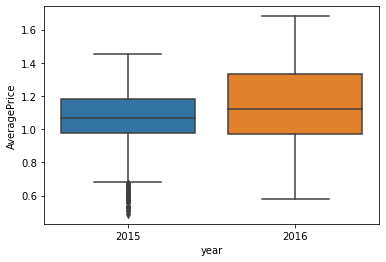

In [153]:
sns.boxplot(x="year",y="AveragePrice",data=df_av)

In [154]:
df_new=df_av[["AveragePrice","Total Volume","region","Total Bags","year"]]

In [155]:
x=df_new[["AveragePrice","Total Volume","Total Bags","year"]]

In [156]:
y=df_new.region

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [158]:
x_train.shape

(1213, 4)

In [159]:
x_test.shape

(304, 4)

In [160]:
y_train.shape

(1213,)

In [161]:
y_test.shape

(304,)

In [162]:
Lg = LogisticRegression()
Lg.fit(x_train,y_train)

LogisticRegression()

In [163]:
y_pred_prob=Lg.predict_proba(x_test)

In [164]:
y_pred_prob

array([[1.75101103e-02, 2.79736127e-02, 3.68138039e-02, ...,
        3.84599574e-02, 3.85596081e-02, 2.06996173e-02],
       [1.96794248e-02, 2.14823163e-02, 2.33285672e-02, ...,
        2.27671202e-02, 2.29163725e-02, 1.97991459e-02],
       [1.12012363e-07, 2.21227438e-04, 4.59408731e-02, ...,
        3.83496047e-02, 4.64313069e-02, 8.32075252e-07],
       ...,
       [1.38127979e-02, 3.22989618e-02, 4.28222072e-02, ...,
        5.78234400e-02, 5.58690502e-02, 2.22510046e-02],
       [1.72007862e-02, 2.90964519e-02, 3.65655386e-02, ...,
        4.16594339e-02, 4.11871795e-02, 2.21224910e-02],
       [1.97558285e-02, 2.10350815e-02, 2.20991364e-02, ...,
        2.19256532e-02, 2.19942555e-02, 1.99937216e-02]])

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dtc=DecisionTreeClassifier()

In [167]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [168]:
dtc.score(x_train,y_train)

1.0

In [171]:
preddtc=dtc.predict(x_test)

In [172]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6644736842105263
[[6 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 2]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.40      0.40      0.40        15
           2       0.90      0.75      0.82        12
           3       1.00      1.00      1.00        12
           4       0.60      1.00      0.75         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       0.80      0.89      0.84         9
           8       0.75      0.86      0.80         7
           9       0.60      0.67      0.63         9
          10       1.00      0.40      0.57         5
          11       0.75      1.00      0.86         3
          12       0.36      0.40      0.38        10
          13       0.67      0.50      0.57         4
          14       0.67      0.50      0.57       

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
knn=KNeighborsClassifier()

In [179]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)

In [181]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6644736842105263
[[6 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 2]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.40      0.40      0.40        15
           2       0.90      0.75      0.82        12
           3       1.00      1.00      1.00        12
           4       0.60      1.00      0.75         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       0.80      0.89      0.84         9
           8       0.75      0.86      0.80         7
           9       0.60      0.67      0.63         9
          10       1.00      0.40      0.57         5
          11       0.75      1.00      0.86         3
          12       0.36      0.40      0.38        10
          13       0.67      0.50      0.57         4
          14       0.67      0.50      0.57       

In [183]:
from sklearn.svm import SVC

In [185]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)

In [187]:
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.10526315789473684
[[ 9  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.07         9
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.49      1.00      0.65        17
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         4
          14 

In [188]:
#Calling the Fucntion

In [189]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)

In [190]:
predsvc=svc.predict(x_test)

In [191]:
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.10526315789473684
[[ 9  0  0 ...  0  0  0]
 [15  0  0 ...  0  0  0]
 [12  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.03      1.00      0.07         9
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           6       0.49      1.00      0.65        17
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         4
          14 

In [192]:
svmkernel('rbf')

In [193]:
svmkernel('poly')